In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
from IPython.display import Markdown as md
import warnings
warnings.filterwarnings("ignore")

# Applied Machine Learning

### Estimating overfitting, bootstrapping, and ensembles

### Train/test split

- Our main goal is to measure performance properly
- Model perfect on the train set might be useless on the test set
- We never train on test data, re-using it makes it impossible to estimate the actual quality

### Who splits the data?

- Sometimes it is you
- In Kaggle you have the split made for you
- Good practice: the manager sets up the test set

### Pitfalls

- Train/test is usually 80/20 but it could change if you have extreme sizes
- Train and test (ideally) should come from the same distribution
- Choosing your model based on test is actually quite wrong

### The proper split: train | validation/development | test

- When we use test set score multiple time, we actually overfit
- We need an additional dataset
- In practice, you can't use test only once
- Be very careful making decision based on test set score

### Does the distributions of test and train match?

- Theory is sure to make them identically distributed
- In practice they might differ
- e.g. test could contain images from all around the world but train could have images only from your office

### Statistical estimators and ML

- In statistics, we often estimate something: means, variances, differences of means, ...
- To see ML models as estimators just use any metric: MSE, accuracy, ...
- Estimators have two important properties: bias and variance

### Bias-variance tradeoff

- We can decompose e.g. the squared error:
$$
\mathop{E} \left[(y - \hat y)^2\right] = (\mathop{E}[y] - \hat y)^2 + (\mathop{E}[\hat y]^2 - \mathop{E}[\hat y]^2) + \mathsf{irreducible~error}
$$
- The $(\mathop{E}[y] - \hat y)$ term is called bias
- The $(\mathop{E}[\hat y]^2 - \mathop{E}[\hat y]^2)$ term is called variance
- There is a tradeoff as you can't have both low bias and low variance

### Estimator with high bias

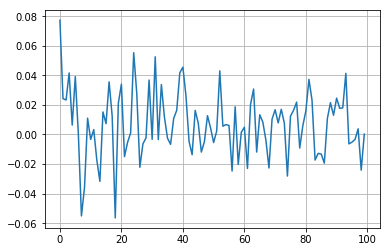

In [2]:
def biased_estimator(values):
    return (values.sum() + 10) / (len(values) + 100) 

ys = [biased_estimator(np.random.randn(i)) for i in range(10, 5000, 50)]
plt.plot(ys); plt.grid()

### Practical biased estimator: Laplace smoothing

- What's the probability of a digit in a sequence?
- Say the digit `7` never occured in a sequence of length 100, unbiased probability gets 0
- Let's smooth (regularize) the probability using prior probability of (1/10):

In [3]:
(0 + 1) / (100 + 10)

0.00909090909090909

### Estimator with high variance

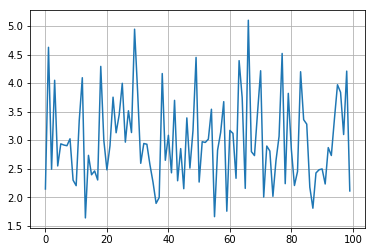

In [4]:
def high_variance_estimator(sample):
    return sample.max() - sample.min()

ys = [high_variance_estimator(np.random.randn(10)) for _ in range(100)]
plt.plot(ys); plt.grid()

### Bias/variance in ML

- High bias means the model never can't fit well enough
- High variance means the model is unstable in fitting it well
- Linear models have high ...? 
- Decision trees have high ...?

### Bias/variance in ML

- Reducing bias usually means changing your model somehow
- Reducing variance is possible other way
- Hint: averaging helps

### Bootstrap

- A useful *practical* trick to assign some accuracy to estimators
- Based on sampling with replacement

In [5]:
list(pd.Series([1, 2, 3]).sample(n=10, replace=True))

[2, 1, 3, 3, 3, 2, 2, 3, 2, 1]

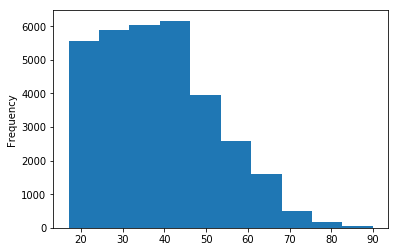

In [6]:
df = pd.read_csv('adult.csv')
df.age.plot.hist();

In [7]:
print("Mean is %f+-[?]" % (df.age.mean()))

Mean is 38.581647+-[?]


Generate slightly different dataset with sampling with replacement:

In [8]:
df.sample(frac=1.0, replace=True).age.mean()

38.45278093424649

Generate differents slightly datasets a few times:

In [9]:
means = []
for _ in range(800):
    means.append(df.sample(frac=1.0, replace=True).age.mean())
means[:10]

[38.51070298823746,
 38.47004084641135,
 38.51782807653328,
 38.54792543226559,
 38.59125948220264,
 38.50741684837689,
 38.49657565799576,
 38.62556432541998,
 38.57734713307331,
 38.696477380915816]

The histogram of generated means:

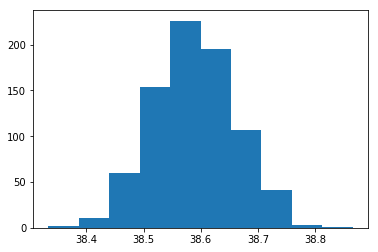

In [10]:
plt.hist(means);

### Confidence interval

- Bootstrapping makes CI really easy
- Given confidence level $p = 0.95$

In [11]:
p = 95
np.percentile(means, (100.0 - p) / 2.0), np.percentile(means, (100.0 + p) / 2.0)

(38.44950861460029, 38.7351378950278)

### Bootstrapping in machine learning

- We can create a few samples with bootstrapping
- This might be helpful

### The Condorcet's jury theorem

- There is a jury of $N$ individuals that make some decision
- The final decision is reached by majority vote
- The decision is either right or wrong
- How does the probability of correct decision changes if we change $N$?

### Averaging models

- We need a few models that are somehow different and independent
- Each model should be just good enough
- The more models we have, the better score we get
- Straightforward if we have a few training sets

### Bagging

- Bootstrap AGGregatING
- We use bootstrap to generate a few datasets
- On each dataset, we train a model
- These models form an ensemble:
$$f(x) = \mathop{avg}_{i} f_i(x)$$

### Random Forest

- An instance of bagging, in which we use decision trees
- One of the most popular algorithms
- Works out of box most of the time
- One slight detail - drop random features in each classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

### Boosting

- Other way to learn a few independent classifiers
- Iterative algorithm
- We learn $f_1$ to fit the labels
- We learn $f_2$ to fit the errors between predictions of $f_1$ and $y$ (residual)
- ....

### Gradient Boosting

- There is a pure beauty analogy betwen this algorithm and gradient descent
- The difference (residual) is actually the gradient of your loss function
- We will discuss the 'gradient' part later
- Each 'base' classifier is usually a tree, but can be a linear model (AdaBoost)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

### Gradient tree boosting

- xgboost
- CatBoost
- LightGBM

These all are easy to install and have almost identical interface

### Hyperparameters

- Depth: gradient boosting needs much less than random forest
- Number of trees: a few hundreds usually suffice

### Next time

- Large scale learning